# Frequency counting in "Ajax"

> This notebook provides code used to generate some preliminary quantiative insights into *Ajax*, based on modern techniques in corpus/computational linguistics, and relying on Python programming.


In [1]:
# switch on the use of data visualisation in this notebook
%matplotlib inline
%pylab inline

# set size and colors for visualisations
import pandas as pd
import seaborn as sns
pylab.rcParams['figure.figsize'] = (12, 6)
colormap = sns.diverging_palette(220, 10, sep=10, n=20)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the main library we use for text processing; models text 'corpora'
from buzz import Corpus
raw = Corpus('data/raw')
# parse the raw texts, already done, only takes ~1 minute, creates 'raw-parsed'
#parsed = raw.parse()
ajax = Corpus('data/raw-parsed')
# load corpus into memory for fast searching
ajax = ajax.load()

## The dataset is now inside a spreadsheet-like format, with one word and its features per line. We can take a look at some of the annotations:

In [3]:
# a slide of our dataset, with each word annotated grammatically
# The data is multiindexed, with text, then sentence, then word. Other texts could be added for comparative work
ajax[["w", "l", "p", "x", "f", "speaker", "stage_direction"]]

w        l    p      x  \
file                            s   i                                  
data/raw-parsed\ajax.txt.conllu 1   1       Son      Son  NNP  PROPN   
                                    2        of       of   IN    ADP   
                                    3   Laertes  Laertes  NNP  PROPN   
                                    4         ,        ,    ,  PUNCT   
                                    5      ever     ever   RB    ADV   
...                                         ...      ...  ...    ...   
                                940 12     what     what   WP   PRON   
                                    13  destiny  destiny   NN   NOUN   
                                    14   awaits    await  VBZ   VERB   
                                    15      him   -PRON-  PRP   PRON   
                                    16        .        .    .  PUNCT   

                                               f speaker stage_direction  
file                            s   i                                     
data/raw-parsed\ajax.txt.conllu 1   1   npadvmod  ATHENA             NaN  
                                    2       prep  ATHENA             NaN  
                                    3       pobj  ATHENA             NaN  
                                    4      punct  ATHENA             NaN  
                                    5     advmod  ATHENA             NaN  
...                                          ...     ...             ...  
                                940 12    dative  CHORUS             NaN  
                                    13     nsubj  CHORUS             NaN  
                                    14     ccomp  CHORUS             NaN  
                                    15      dobj  CHORUS             NaN  
                                    16     punct  CHORUS             NaN  

[13579 rows x 7 columns]

## Word counts

In [4]:
# total words in our text
len(ajax)

13579

In [5]:
# skip those marked as stage directions
len(ajax.skip.stage_direction("True"))

13467

In [6]:
# proportion of text rendered by chorus
len(ajax.just.speaker.CHORUS) / len(ajax)

0.14470874143898668

## Distribution of words by speaker

In [7]:
ab = ajax.speaker.value_counts()
rel = ab * 100 / len(ajax)
df = pd.concat([ab, rel], axis=1)
df.columns = ["Absolute", "Relative"]
df

,Absolute,Relative
AJAX,2525,18.594889
TEUCER,2157,15.884822
TECMESSA,1965,14.470874
CHORUS,1965,14.470874
ODYSSEUS,852,6.274394
ATHENA,784,5.773621
LEADER,782,5.758892
MENELAUS,636,4.683703
AGAMEMNON,621,4.573238
MESSENGER,288,2.120922


## Simple counting of most common nouns by speaker

In [8]:
noun = ajax.just.wordclass.NOUN
noun.table(subcorpora="speaker", show="l").iloc[:,:20]

l,man,word,hand,friend,foe,son,sword,god,child,day,death,none,tent,host,father,woe,life,time,heart,night
speaker,,,,,,,,,,,,,,,,,,,,
AGAMEMNON,8,1,0,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
AJAX,10,2,5,7,9,8,4,3,2,4,3,3,2,3,6,2,6,3,5,1
ATHENA,5,2,4,0,2,1,1,3,0,2,0,0,4,1,0,0,0,0,1,1
CHORUS,9,0,2,2,1,5,3,3,1,3,4,4,1,1,0,2,1,3,4,4
LEADER,2,7,1,0,1,1,0,0,0,0,0,1,2,0,0,1,0,1,0,0
MENELAUS,5,2,1,1,2,0,0,0,0,1,2,0,0,1,0,0,1,2,0,1
MESSENGER,1,2,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
ODYSSEUS,9,2,4,6,6,0,1,1,0,2,0,2,0,0,0,0,0,0,0,1
SEMICHORUS_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Look at use of "man/men" for two speakers

> Concordances can help us understand how a word is being deployed in context. It can help us move between quantitative and qualitative perspectives, ensuring that we are counting what we assume we are.

In [9]:
man = ajax.just.speaker(["AJAX", "TEUCER"]).just.lemma.man
man.conc(metadata=["speaker"])

,left,match,right,speaker
0,"is curse . Behold now the bold , the",man,"stout of heart , Who ne'er shrank in",AJAX
1,"ds , nor any more from fellow mortal",men,"to claim kindness : no , but she the",AJAX
2,"he award of valour his own arms , no",man,'s hand would have grasped them befo,AJAX
3,hus pervert judgment against another,man,. but the irresistible fierce - eyed,AJAX
4,am no coward . for ' tis base for a,man,to crave long life who endures never,AJAX
5,? as of no worth would I esteem that,man,who warms himself with unsubstantial,AJAX
6,guiding the child 's steps . Is the,man,coming ? Has he heard thy call ? See,AJAX
7,t I should not learn wisdom ? of all,men,"I , whom proof hath taught of late h",AJAX
8,ay to prove our foe ; since oftenest,men,in friendship but a faithless haven,AJAX
9,have been destroyed : and these vile,men,by a vile doom utterly may they cut,AJAX


## Main verbs used by each character by log-likelihood keyness

In [10]:
# skip modals, like can, could, would, should, because these are very common verbs
verbs = ajax.skip.pos.MD.just.wordclass.VERB
# show the base form (i.e. coming -> come) of verbs in this case
verbs = verbs.table(subcorpora="speaker", show="l", keyness="ll").iloc[:,:10]
verbs

l,come,see,go,know,find,be,speak,hear,bring,stand
speaker,,,,,,,,,,
AGAMEMNON,4.813548,-0.333763,2.051417,2.301153,-0.166881,-3.348056,6.896598,2.775192,8.219682,3.078097
AJAX,22.012170,7.087931,11.388583,5.127734,11.502304,-4.842524,16.478317,6.413168,10.741951,7.235992
ATHENA,7.831018,9.845219,-0.400119,6.005654,-0.220755,-4.428904,-0.358727,2.281304,2.372819,13.525888
CHORUS,7.160580,5.830821,-0.852239,0.712798,1.319124,-9.433409,0.665243,1.073091,1.149016,1.319124
LEADER,12.602681,9.964017,10.486830,6.083779,-0.216074,-4.334989,5.946251,7.052890,2.410273,-0.216074
MENELAUS,-0.559053,1.673787,6.024600,6.549670,14.382815,-3.818213,-0.309263,-0.226000,7.721898,-0.190316
MESSENGER,6.794357,-0.192948,15.096929,15.917088,-0.096474,-1.935514,3.214045,-0.114563,-0.108533,4.101505
ODYSSEUS,12.523654,15.244965,1.608204,16.996307,7.622482,-0.816965,1.781765,7.012718,-0.245717,-0.218415
SEMICHORUS_1,-0.020765,-0.014138,-0.012812,-0.011045,21.120667,-0.141821,-0.011487,-0.008394,-0.007953,-0.007069


## Heatmap visualisation with pandas/seaborn

> This kind of method can help expose when one character is particularly fond of a word, necessitating further analysis using more qualitative methods

Text(0.5, 1.0, 'Verb heatmap by character')

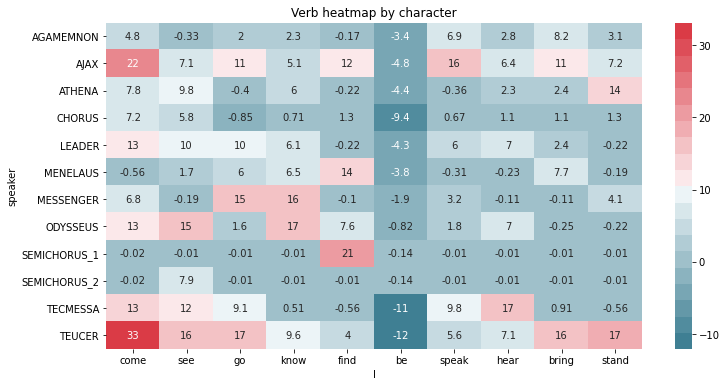

In [11]:
# generate our heatmap, rounding to two decimal places
heat = sns.heatmap(verbs.round(2), annot=True, cmap=colormap)

# add title
heat.set_title('Verb heatmap by character')

## Main nouns by character

> Reperform a similar kind of analysis, but use nouns, rather than verbs, and use relative frequencies, not keyness

In [12]:
nouns = ajax.just.wordclass.NOUN
nouns = nouns.table(subcorpora="speaker", show="l", relative=True).iloc[:,:10]
nouns

l,toil,man,ship,word,path,friend,glance,hand,sun,foe
speaker,,,,,,,,,,
AGAMEMNON,0.000000,10.389610,0.000000,1.298701,0.000000,2.597403,0.000000,0.000000,0.000000,1.298701
AJAX,0.000000,2.673797,0.267380,0.534759,0.267380,1.871658,0.000000,1.336898,0.000000,2.406417
ATHENA,0.813008,4.065041,0.813008,1.626016,0.813008,0.000000,0.000000,3.252033,0.000000,1.626016
CHORUS,0.280899,2.528090,0.561798,0.000000,0.000000,0.561798,0.280899,0.561798,0.000000,0.280899
LEADER,0.000000,1.785714,0.000000,6.250000,0.000000,0.000000,0.000000,0.892857,0.000000,0.892857
MENELAUS,0.000000,4.901961,0.000000,1.960784,0.000000,0.980392,0.000000,0.980392,0.000000,1.960784
MESSENGER,0.000000,3.225806,0.000000,6.451613,0.000000,3.225806,0.000000,3.225806,0.000000,0.000000
ODYSSEUS,0.000000,8.108108,0.000000,1.801802,0.000000,5.405405,0.000000,3.603604,0.000000,5.405405
SEMICHORUS_1,50.000000,0.000000,0.000000,0.000000,16.666667,0.000000,16.666667,0.000000,16.666667,0.000000


Text(0.5, 1.0, 'Relative frequency of common nouns by character')

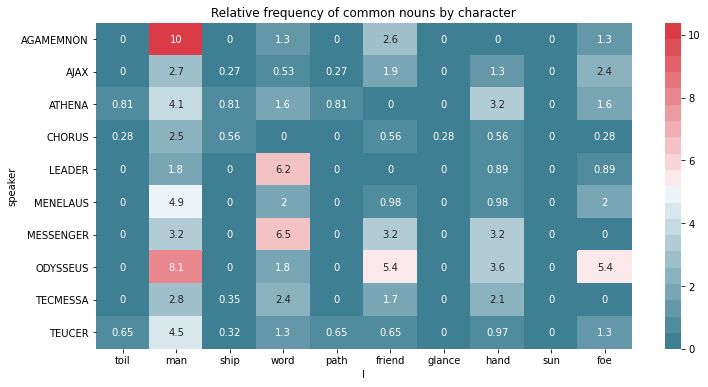

In [13]:
# skip these very rare speakers, as they distort the data
skip = ["SEMICHORUS_1", "SEMICHORUS_2"]

# generate our heatmap, rounding to two decimal places
heat = sns.heatmap(nouns.round(2).drop(skip), annot=True, cmap=colormap)

# add title
heat.set_title('Relative frequency of common nouns by character')

That's all for now, but really, all kinds of analyses are possible from here!